# 项目：评估和清理英国电商公司销售数据

## 分析目标

此数据分析的目的是，根据市场销售数据，挖掘畅销产品，以便制定更有效的市场策略来提升营收。



## 简介

原始数据集记录了一家英国在线零售公司在2010年12月1日至2011年12月9日期间的所有交易情况，涵盖了该公司在全球不同国家和地区的业务数据。该公司主要销售覆盖各个场景的礼品，包括但不限于生日礼品、结婚纪念品、圣诞礼品等等。该公司的客户群体主要包括批发商和个人消费者，其中批发商占据了相当大的比例。

数据每列的含义如下：
- `InvoiceNo`: 发票号码。6位数，作为交易的唯一标识符。如果这个代码以字母“c”开头，表示这笔交易被取消。
- `StockCode`: 产品代码。5位数，作为产品的唯一标识符。
- `Description`: 产品名称。
- `Quantity`: 产品在交易中的数量。
- `InvoiceDate`: 发票日期和时间。交易发生的日期和时间。
- `UnitPrice`: 单价。价格单位为英镑（£）。
- `CustomerID`: 客户编号。5位数，作为客户的唯一标识符。
- `Country`: 国家名称。客户所居住的国家的名称。

## 读取数据

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
original_data = pd.read_csv("e_commerce.csv")
original_data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
254536,559318,22742,MAKE YOUR OWN PLAYTIME CARD KIT,1,7/7/2011 14:08,2.95,18013.0,United Kingdom
537891,581376,22586,FELTCRAFT HAIRBAND PINK AND BLUE,6,12/8/2011 12:43,0.85,14719.0,United Kingdom
227421,556876,21989,PACK OF 20 SKULL PAPER NAPKINS,1,6/15/2011 11:56,0.85,16241.0,United Kingdom
12649,537391,21355,TOAST ITS - I LOVE YOU,3,12/6/2010 13:53,1.25,16550.0,United Kingdom
114540,546025,85172,?sold as sets?,-600,3/8/2011 17:31,0.00,NaN,United Kingdom
373572,569332,22629,SPACEBOY LUNCH BOX,1,10/3/2011 13:46,1.95,12637.0,France
453578,575486,23250,VINTAGE RED TRIM ENAMEL BOWL,24,11/9/2011 17:07,1.25,14911.0,EIRE
340541,566669,21704,BAG 250g SWIRLY MARBLES,12,9/14/2011 11:36,0.85,18065.0,United Kingdom
323230,565261,22908,PACK OF 20 NAPKINS RED APPLES,12,9/2/2011 10:53,0.85,12474.0,Germany
92801,544205,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,2/17/2011 10:31,16.63,NaN,United Kingdom


## 评估数据

读取后观察结果：

    1.表格每列表示一个变量，每行表示一个观察值，每个单元格是一个值，不存在显著结构性问题。
    
待评估问题：

    1.是否存在缺失数据（是）。
    
    2.是否存在重复数据。
    
    3.是否存在表述不一致数据。
    
    4.是否存在无效数据。

    5.是否存在异常数据。

    6.是否存在数据类型错误


In [11]:
original_data.info()  # 查看基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 评估缺失数据

In [13]:
original_data.isnull().sum() #查看缺失值个数

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

从输出结果来看， Description和CustomerID数据存在缺失值，需进一步分析。CustomerID数据类型应为字符串，InvoiceDate的数据类型应为日期，存在数据类型错误。

    1.Description缺失值，根据分析目标，Description表示产品名称，为分析的关键变量，不应该存在缺失值。因此提取缺失数据观察。

    2.CustomerID表示客户编号，不是分析畅销商品的必要变量，因此可以保留此变量为空的观察值。

In [15]:
original_data[original_data["Description"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


观察结果：缺失Description的交易数据，UnitPrice都为0。为了验证猜想，我们增加筛选条件，看是否存在Description变量缺失且UnitPrice不为0的数据。

In [17]:
original_data[(original_data["Description"].isnull()) & (original_data["UnitPrice"] != 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


筛选出来结果数量为0条，说明缺失Description值的数据，也同时缺失有效的UnitPrice值。

Description表示产品名称，UnitPrice表示产品单价，都是进行后续商品交易分析的重要变量。如果它们同时缺失，我们认为数据无法提供有效含义，因此这些后续可以被删除。

#### 评估异常数据

In [20]:
original_data.describe()  #查看统计数据

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


从输出结果来看，Quantity和UnitPrice都存在负数值，需进一步分析确认含义。CustomerID数据类型应为str，存在数据类型错误。

1.筛选Quantity小于0的数据

In [23]:
original_data[original_data["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


从筛选结果来看，Quantity变量为负数的观察值，InvoiceNo似乎均以C开头，表示订单被取消。

为了验证该猜想，增加筛选条件，看是否存在Quantity变量为负数且InvoiceNo不以C开头的观察值。

In [25]:
original_data[(original_data["Quantity"] < 0) & (original_data["InvoiceNo"].str[0] != "C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


以上猜想被证实错误，因为还存在1336条Quantity变量为负数且InvoiceNo不以C开头的观察值。

但根据以上输出结果，这些筛选出的观察值的UnitPrice观察值均为0，因此增加UnitPrice的条件进行验证。

In [27]:
original_data[(original_data["Quantity"] < 0)&(original_data["InvoiceNo"].str[0] != "C")&(original_data["UnitPrice"] != 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


根据输出结果，猜想得到验证，当Quantity变量为负数的时候，观察值满足以下条件之一：

    InvoiceNo以C开头，表示订单被取消

    UnitPrice为0，说明单价为0英镑

这些交易数据均不是有效成交数据，不贡献销售，不在后续分析范围内，因此我们将在数据清理步骤，将Quantity为负数的观察值删除。

2.筛选UnitPrice小于0的数据

In [30]:
original_data[original_data["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


从输出结果来看，UnitPrice为负数的观察值都是坏账调账，不属于实际商品交易数据，因此也在数据清理步骤中也将其删除。

#### 评估重复数据

In [33]:
original_data.duplicated().sum()

5268

从输出结果来看，表格存在5268条重复数据，根据数据变量的含义来看，虽然InvoiceNo、StockCode和CustomerID都是唯一标识符，但一次交易可能包含多件商品，因此InvoiceNo可以存在重复，不同交易可以包含同件商品，因此StockCode可以存在重复，顾客可以进行多次交易或下单多个商品，因此CustomerID也可以存在重复。

那么针对此数据集，我们无需对重复数据进行处理。

#### 评估表述不一致数据

In [36]:
original_data["Country"].value_counts()

Country
United Kingdom          495266
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
China                      288
Singapore                  229
USA                        218
UK                         211
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United States               73
United Arab Emirates        68


从输出结果来看，"USA"、"United States"均在表示美国，"United Kingdom"、"UK"、"U.K."均在表示英国，因此应该在清洗步骤对这些值进行统一，只保留一个指代值。

#### 评估结论

根据前面评估部分得到的结论，我们需要进行的数据清理包括：

    1.把InvoiceDate变量的数据类型转换为为日期时间
    2.把CustomerID变量的数据类型转换为字符串
    3.把Description变量缺失的观察值删除
    4.把Country变量值"USA"替换为"United States"
    5.把Country变量值"UK"、"U.K."替换为"United Kingdom"
    6.把Quantity变量值为负数的观察值删除
    7.把UnitPrice变量值为负数的观察值删除

## 清理数据

In [41]:
cleaned_data = original_data.copy()
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


1.把InvoiceDate变量的数据类型转换为为日期时间，customerID变量的数据类型转换为字符串(把CustomerID变量值结尾的".0"删除)

In [43]:
cleaned_data["InvoiceDate"] = pd.to_datetime(cleaned_data["InvoiceDate"])
cleaned_data["CustomerID"] = cleaned_data["CustomerID"].astype(str)
cleaned_data["CustomerID"] = cleaned_data["CustomerID"].str.slice(0, -2)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


2.把Description变量缺失的观察值删除

In [46]:
cleaned_data.dropna(subset=["Description"], inplace=True)
cleaned_data["Description"].isnull().sum()

0

3.把Country变量值"USA"替换为"United States", 把Country变量值"UK"、"U.K."替换为"United Kingdom"

In [48]:
cleaned_data["Country"] = cleaned_data["Country"].replace({"USA": "United States"})
cleaned_data["Country"] = cleaned_data["Country"].replace({"UK": "United Kingdom", "U.K.": "United Kingdom"})

In [49]:
print(len(cleaned_data[cleaned_data["Country"] == "USA"]))
print(len(cleaned_data[cleaned_data["Country"] == "UK"]))
print(len(cleaned_data[cleaned_data["Country"] == "U.K."]))

0
0
0


4.把Quantity变量值为负数的观察值和UnitPrice变量值为负数的观察值删除

In [51]:
cleaned_data = cleaned_data[cleaned_data["Quantity"] >= 0]
cleaned_data = cleaned_data[cleaned_data["UnitPrice"] >= 0]
print(len(cleaned_data[cleaned_data["Quantity"] < 0]))
print(len(cleaned_data[cleaned_data["UnitPrice"] < 0]))

0
0


## 保存清理后的数据

In [53]:
cleaned_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [54]:
cleaned_data.to_csv("e_commerce_cleaned.csv", index=False)

## 数据整合

1.此次数据分析目的为：“根据市场销售数据，挖掘畅销产品，以便制定更有效的市场策略来提升营收”，因此要将产品根据销量排序，首先将产品按照StockCode聚合，查看各个产品的销量和销售额，将数据排序，观察销售额和销量最高的10个产品。

In [98]:
data_for_analysis = cleaned_data.copy()
data_for_analysis["Sales"]=data_for_analysis["Quantity"] * data_for_analysis["UnitPrice"]
data_sort_by_sales = data_for_analysis.groupby(["StockCode", "Description"])[["Quantity", "Sales"]].sum().sort_values(by="Sales", ascending=False).head(10)
data_sort_by_quantity = data_for_analysis.groupby(["StockCode", "Description"])[["Quantity", "Sales"]].sum().sort_values(by="Quantity", ascending=False).head(10)
data_sort_by_sales

,,Quantity,Sales
StockCode,Description,,
DOT,DOTCOM POSTAGE,708,206248.77
22423,REGENCY CAKESTAND 3 TIER,13890,174484.74
23843,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603,104340.29
47566,PARTY BUNTING,18299,99504.33
85099B,JUMBO BAG RED RETROSPOT,48478,94340.05
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
M,Manual,7230,78110.27
POST,POSTAGE,3150,78101.88


In [100]:
data_sort_by_quantity

,,Quantity,Sales
StockCode,Description,,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,13841.85
85099B,JUMBO BAG RED RETROSPOT,48478,94340.05
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603,104340.29
22197,POPCORN HOLDER,36761,34298.87
84879,ASSORTED COLOUR BIRD ORNAMENT,36461,59094.93
21212,PACK OF 72 RETROSPOT CAKE CASES,36419,21259.10
23084,RABBIT NIGHT LIGHT,30788,66964.99


观察发现，data_sort_by_sales中存在StockCode为 "DOT", "M", "POST"的产品，其产品描述为网络邮资、手工费和邮费，并非商品，因此要从排名中剔除。|

In [103]:
data_sort_by_sales = data_for_analysis.set_index("StockCode")
data_sort_by_sales = data_sort_by_sales.drop(["DOT", "M", "POST"])
data_sort_by_sales = data_sort_by_sales.groupby(["StockCode", "Description"])[["Quantity", "Sales"]].sum().sort_values(by="Sales", ascending=False).head(10)
data_sort_by_sales

,,Quantity,Sales
StockCode,Description,,
22423,REGENCY CAKESTAND 3 TIER,13890,174484.74
23843,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603,104340.29
47566,PARTY BUNTING,18299,99504.33
85099B,JUMBO BAG RED RETROSPOT,48478,94340.05
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
23084,RABBIT NIGHT LIGHT,30788,66964.99
22086,PAPER CHAIN KIT 50'S CHRISTMAS,19355,64952.29
84879,ASSORTED COLOUR BIRD ORNAMENT,36461,59094.93


2.对照以上两个表格，结合主观评价，得出综合最畅销且可以提高营收产品前三名分别为StockCode:"23843", "23166", "85099B	",下一步需要进一步核对产品销售情况

In [118]:
data_for_analysis.query("StockCode == '23843'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


In [120]:
data_for_analysis.query("StockCode == '23166'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-05-12 10:10:00,1.04,14646,Netherlands,99.84
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12 12:11:00,1.25,16745,United Kingdom,5.00
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12 16:29:00,1.25,14651,United Kingdom,6.25
187868,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,2011-05-12 16:52:00,1.25,13601,United Kingdom,3.75
...,...,...,...,...,...,...,...,...,...
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-07 12:16:00,1.25,15984,United Kingdom,2.50
536248,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-12-08 09:28:00,2.46,n,United Kingdom,2.46
539776,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-08 16:30:00,2.46,n,United Kingdom,4.92
540301,581476,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2011-12-09 08:48:00,1.04,12433,Norway,49.92


In [122]:
data_for_analysis.query("StockCode == '85099B'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 10:19:00,1.65,17511,United Kingdom,165.00
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,2010-12-01 11:45:00,1.95,17908,United Kingdom,3.90
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:23:00,1.95,17968,United Kingdom,1.95
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:49:00,1.95,15012,United Kingdom,1.95
...,...,...,...,...,...,...,...,...,...
538603,581412,85099B,JUMBO BAG RED RETROSPOT,3,2011-12-08 14:38:00,2.08,14415,United Kingdom,6.24
538913,581421,85099B,JUMBO BAG RED RETROSPOT,9,2011-12-08 15:23:00,2.08,15898,United Kingdom,18.72
539338,581439,85099B,JUMBO BAG RED RETROSPOT,1,2011-12-08 16:30:00,4.13,n,United Kingdom,4.13
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,2011-12-09 09:38:00,2.08,17001,United Kingdom,20.80


观察结果可以发现，StockCode为23843的纸质小鸟虽然销量高，但只有一单，表示只有单个客户且只有一次有大量需求，因此该产品不能认为是畅销产品，再次评价选出畅销产品第三名为StockCode为85123A的灯座。

In [125]:
data_for_analysis.query("StockCode == '85123A'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,15.30
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850,United Kingdom,15.30
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511,United Kingdom,163.20
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408,United Kingdom,81.60
...,...,...,...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,2011-12-08 16:30:00,5.79,n,United Kingdom,5.79
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675,United Kingdom,81.60
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,15796,United Kingdom,17.70
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,2011-12-09 10:03:00,5.79,n,United Kingdom,17.37


## 数据可视化

1.设置表盘，将数据整合

In [141]:
sns.set_palette("pastel")
best_selling_products = data_for_analysis.query("(StockCode == '85123A') | (StockCode == '85099B') | (StockCode == '23166')").sort_values(by="StockCode").reset_index().drop("index", axis=1)
best_selling_products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,556415,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2011-06-10 12:19:00,1.04,12409,Switzerland,49.92
1,568686,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-09-28 14:26:00,1.25,16115,United Kingdom,2.50
2,561892,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-07-31 14:27:00,1.25,n,United Kingdom,1.25
3,561901,23166,MEDIUM CERAMIC TOP STORAGE JAR,288,2011-07-31 15:42:00,1.25,14156,EIRE,360.00
4,575176,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-11-08 18:29:00,2.46,n,United Kingdom,4.92
...,...,...,...,...,...,...,...,...,...
4630,553387,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-05-16 16:33:00,2.95,n,United Kingdom,17.70
4631,553390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2011-05-16 16:41:00,2.95,17841,United Kingdom,11.80
4632,553393,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2011-05-16 16:46:00,2.95,n,United Kingdom,41.30
4633,553412,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-05-17 09:40:00,2.95,14344,United Kingdom,17.70


2.可视化上述三种畅销产品的销量和销售额在所有订单中的比重

In [153]:
total_quantity = data_for_analysis["Quantity"].sum()
total_sales = data_for_analysis["Sales"].sum()

In [191]:
other_quantity = total_quantity-compare_data_1["Quantity"].sum()
other_sales = total_sales-compare_data_1["Sales"].sum()
best_selling_products.loc["4635"] = ["0", "Others", "0", other_quantity, "0", "0", "0", "0", other_sales]
compare_data = best_selling_products.groupby(["StockCode"])[["Quantity", "Sales"]].sum().reset_index()
compare_data

,StockCode,Quantity,Sales
0,23166,78033,8.170092e+04
1,85099B,48478,9.434005e+04
2,85123A,41664,1.045188e+05
3,Others,5460257,1.038612e+07


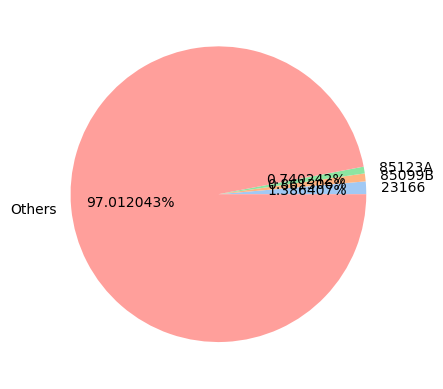

In [193]:
plt.pie(compare_data["Quantity"], labels=compare_data["StockCode"], autopct="%1f%%")
plt.show()

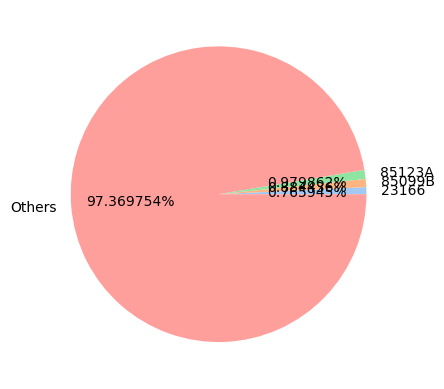

In [195]:
plt.pie(compare_data["Sales"], labels=compare_data["StockCode"], autopct="%1f%%")
plt.show()

观察以上饼图可知，综合最畅销的三个产品的销量和销售额在所有产品中占比仍然不高，都在3%左右。

3.可视化三种畅销产品之间的关系。

In [204]:
best_selling_products = best_selling_products.drop("4635")
best_selling_products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,556415,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2011-06-10 12:19:00,1.04,12409,Switzerland,49.92
1,568686,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-09-28 14:26:00,1.25,16115,United Kingdom,2.50
2,561892,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-07-31 14:27:00,1.25,n,United Kingdom,1.25
3,561901,23166,MEDIUM CERAMIC TOP STORAGE JAR,288,2011-07-31 15:42:00,1.25,14156,EIRE,360.00
4,575176,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-11-08 18:29:00,2.46,n,United Kingdom,4.92
...,...,...,...,...,...,...,...,...,...
4630,553387,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-05-16 16:33:00,2.95,n,United Kingdom,17.70
4631,553390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2011-05-16 16:41:00,2.95,17841,United Kingdom,11.80
4632,553393,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2011-05-16 16:46:00,2.95,n,United Kingdom,41.30
4633,553412,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-05-17 09:40:00,2.95,14344,United Kingdom,17.70


In [206]:
best_selling_products_grouped = best_selling_products.groupby(["StockCode"])[["Quantity", "Sales"]].sum().reset_index()
best_selling_products_grouped

,StockCode,Quantity,Sales
0,23166,78033,81700.92
1,85099B,48478,94340.05
2,85123A,41664,104518.80


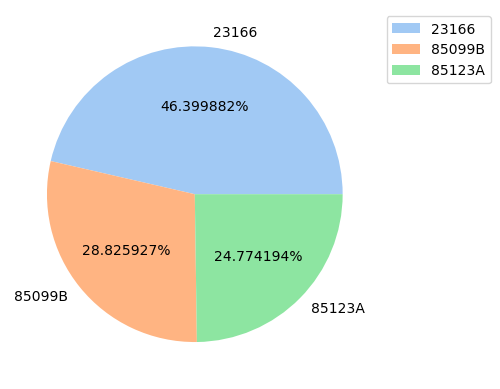

In [222]:
plt.pie(best_selling_products_grouped["Quantity"], labels=best_selling_products_grouped["StockCode"], autopct="%1f%%")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

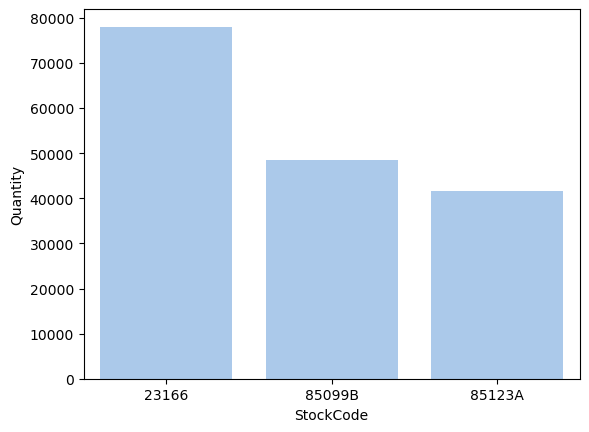

In [234]:
sns.barplot(y=best_selling_products_grouped["Quantity"], x=best_selling_products_grouped["StockCode"])
plt.show()

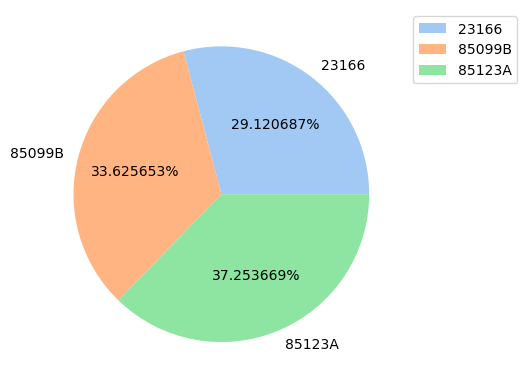

In [224]:
plt.pie(best_selling_products_grouped["Sales"], labels=best_selling_products_grouped["StockCode"], autopct="%1f%%")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

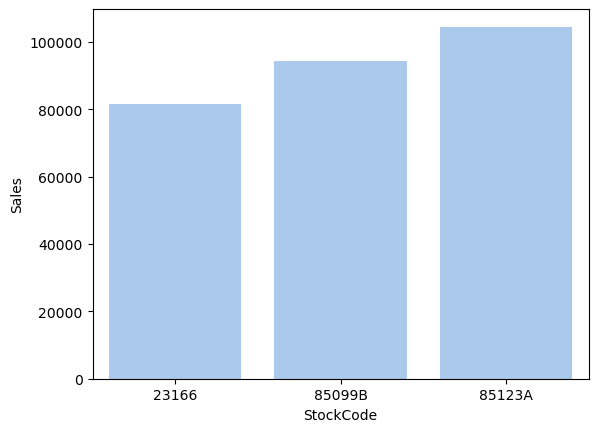

In [236]:
sns.barplot(y=best_selling_products_grouped["Sales"], x=best_selling_products_grouped["StockCode"])
plt.show()

由图可知：23166产品销量远超其他两个产品，最受消费者喜爱，但销售额最低；85123A产品虽然销量在三个产品中最低，但销售额最高；85099B在三个产品中则较为中庸。
分析结果还需结合成本等因素综合考量后再制定销售策略。

3.可视化畅销产品对于国家地区的分布情况。

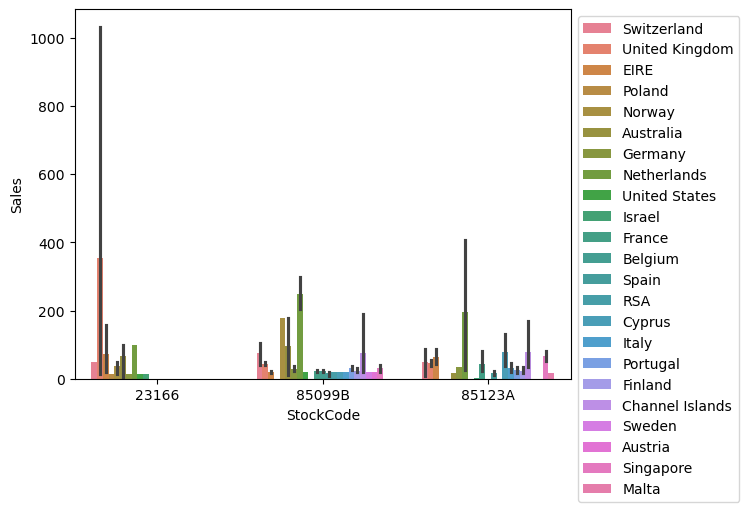

In [278]:
country_distrabution = sns.barplot(best_selling_products, x="StockCode", y="Sales",hue="Country")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

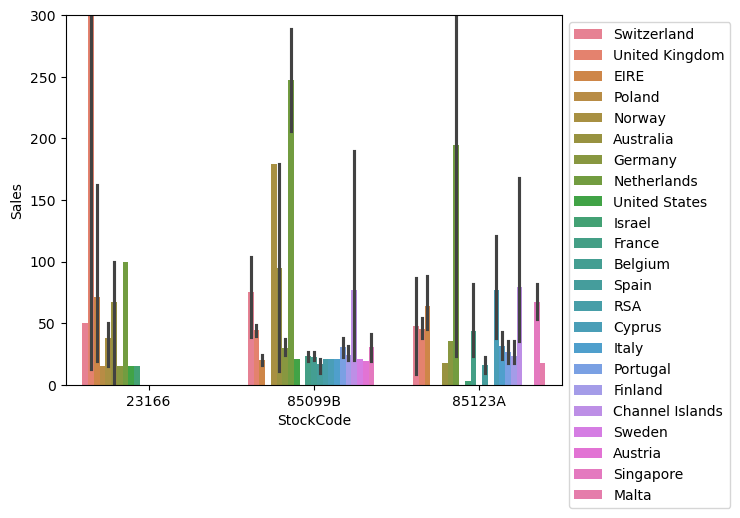

In [276]:
country_distrabution = sns.barplot(best_selling_products, x="StockCode", y="Sales",hue="Country")
plt.legend(bbox_to_anchor=(1,1))
country_distrabution.set_ylim(0,300)
plt.show()

由图可知：

23166产品绝大部分销量都在英国本土，并且在法国、意大利、西班牙等等许多国家都完全没有销量，因此应当结合国际运输成本考虑该产品的国际销售业务是否继续。

85099B产品和85123A产品在荷兰非常受欢迎，可以考虑加大在荷兰的宣传力度，考虑与物流公司商谈，降低国际运输成本。